In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


##Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Flight_delay.csv to Flight_delay.csv


In [ ]:
df=pd.read_csv ("Flight_delay.csv")
df.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,...,2,5,0,N,0,12,0,0,0,25
6,4,03-01-2019,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,...,5,5,0,N,0,7,0,0,0,12
7,4,03-01-2019,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,...,6,6,0,N,0,40,0,0,0,7
8,4,03-01-2019,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,...,6,7,0,N,0,5,0,0,0,59
9,4,03-01-2019,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,...,6,11,0,N,0,3,0,0,0,69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayOfWeek          484551 non-null  int64 
 1   Date               484551 non-null  object
 2   DepTime            484551 non-null  int64 
 3   ArrTime            484551 non-null  int64 
 4   CRSArrTime         484551 non-null  int64 
 5   UniqueCarrier      484551 non-null  object
 6   Airline            484551 non-null  object
 7   FlightNum          484551 non-null  int64 
 8   TailNum            484551 non-null  object
 9   ActualElapsedTime  484551 non-null  int64 
 10  CRSElapsedTime     484551 non-null  int64 
 11  AirTime            484551 non-null  int64 
 12  ArrDelay           484551 non-null  int64 
 13  DepDelay           484551 non-null  int64 
 14  Origin             484551 non-null  object
 15  Org_Airport        483374 non-null  object
 16  Dest               4

In [ ]:
df.shape

(484551, 29)

##Select Colmuns

In [ ]:
df = df[['DayOfWeek', 'Date', 'DepTime', 'Airline','Dest', 'CarrierDelay', 'Origin'] ]
df

,DayOfWeek,Date,DepTime,Airline,Dest,CarrierDelay,Origin
0,4,03-01-2019,1829,Southwest Airlines Co.,BWI,2,IND
1,4,03-01-2019,1937,Southwest Airlines Co.,LAS,10,IND
2,4,03-01-2019,1644,Southwest Airlines Co.,MCO,8,IND
3,4,03-01-2019,1452,Southwest Airlines Co.,PHX,3,IND
4,4,03-01-2019,1323,Southwest Airlines Co.,TPA,0,IND
...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,American Airlines Inc.,MCO,27,DFW
484547,6,14-06-2019,1616,American Airlines Inc.,MCO,11,DFW
484548,2,17-06-2019,1617,American Airlines Inc.,MCO,0,DFW
484549,7,22-06-2019,1607,American Airlines Inc.,MCO,1,DFW


##Check for missing data

In [ ]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
Airline,0
Dest,0
CarrierDelay,0
Origin,0


##Convert Date column to pandas datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

/tmp/ipython-input-4183834281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


##Create Month and Day Feature

In [ ]:
#Extracting data (month and day) for the model
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

/tmp/ipython-input-1384016537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month
/tmp/ipython-input-1384016537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['Date'].dt.day


#Drop date now

In [ ]:
#Drop the original 'Date' column since XGBoost doesn't handle datetime types

df= df.drop(columns= ['Date'])

##Identify categorical variables

In [ ]:
categories = df.select_dtypes(include =['object']).columns
categories

Index(['Airline', 'Dest', 'Origin'], dtype='object')

##One-hot encoding (dummy variables) for categorical data

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

#Prepare Target variable(s)

In [ ]:
df_encoded['is_delayed_60+']= np.where(df_encoded['CarrierDelay']> 60 , 1, 0)

##Define features and target variables

In [ ]:
x = df_encoded.drop(columns=['is_delayed_60+', 'CarrierDelay'])
y = df_encoded['is_delayed_60+']

##Split the data into testing and training sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Exploratory Data Analysis
Put train x and y together

In [ ]:
train_set = pd.concat([x_train, y_train], axis=1)

##Undo one-hot encoding

In [ ]:
#reversing one-hot encoding for multiple sets of categorical variables
for category in categories:
  one_hot_columns= [col for col in train_set.columns if col.startswith(f'{category}_')]
  train_set[category]= train_set[one_hot_columns].idxmax(axis=1)
  train_set = train_set.drop(columns= one_hot_columns)
  train_set[category] =  train_set[category].str.replace(f'{category}_', '')

In [ ]:
train_set['is_delayed_60+'].value_counts()

,count
is_delayed_60+,
0,313876
1,25309


In [ ]:
train_set['is_delayed_60+'].mean()

np.float64(0.07461709686454294)

##Delays by airline

In [ ]:
train_set.groupby('Airline')['is_delayed_60+'].mean().sort_values(ascending=False).round(3)*100

,is_delayed_60+
Airline,
Atlantic Southeast Airlines,16.3
Hawaiian Airlines Inc.,14.2
Skywest Airlines Inc.,10.3
American Airlines Inc.,9.0
Delta Air Lines Inc.,8.4
US Airways Inc.,7.6
United Air Lines Inc.,7.5
American Eagle Airlines Inc.,7.0
JetBlue Airways,5.9


##Delays by Day Of The Week

In [ ]:
DayOfWeek_pct_delayed = train_set.groupby('DayOfWeek')['is_delayed_60+'].mean().round(3)*100
DayOfWeek_pct_delayed

,is_delayed_60+
DayOfWeek,
1,7.6
2,7.1
3,7.6
4,6.9
5,6.8
6,9.0
7,7.9


##Delays by origin Airport

In [ ]:
pct_delay_by_origin = train_set.groupby('Origin')['is_delayed_60+'].mean().sort_values(ascending= False).round(3)*100
pct_delay_by_origin.head(20)

,is_delayed_60+
Origin,
ACY,40.0
LWB,40.0
MQT,33.8
MCN,27.8
SLE,26.7
SCE,25.0
PFN,23.6
PHF,23.1
MKG,22.6


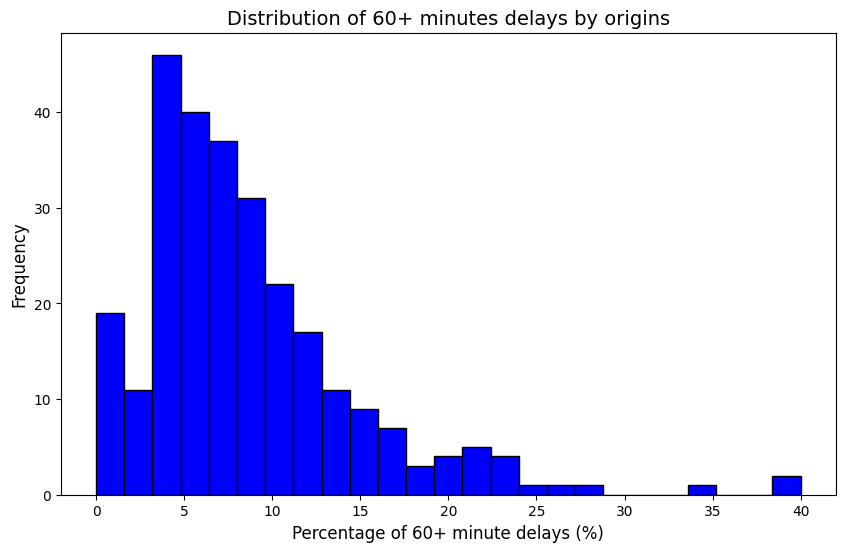

In [ ]:
#Plot Histogram

plt.figure(figsize=(10,6))
plt.hist(pct_delay_by_origin.values, bins=25, color='blue', edgecolor='black')

#Add labels and titles
plt.title("Distribution of 60+ minutes delays by origins", fontsize=14)
plt.xlabel("Percentage of 60+ minute delays (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

#Initialise and firt the XGBoost classifier (baseline model)

In [ ]:

xgb_model= xgb.XGBClassifier (random_state=0, eval_metric='logloss')

In [ ]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
#Train the model

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

##Predict on the test set

In [ ]:
y_pred = xgb_model.predict(x_test)

##Evaluate the model

In [ ]:
print("XGBoost Classifier (Baseline):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

XGBoost Classifier (Baseline):
Accuracy: 0.9248


In [ ]:
#Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[134322,     61],
       [ 10871,    112]])

In [ ]:
#predict probabilities for the test set (to calculate AUC)

y_pred_proba = xgb_model.predict_proba(x_test)[:, 1] #we need probabilities for the positive class

#Calculate teh AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print (f"AUC scores: {auc_score:.4f}")

AUC scores: 0.7135


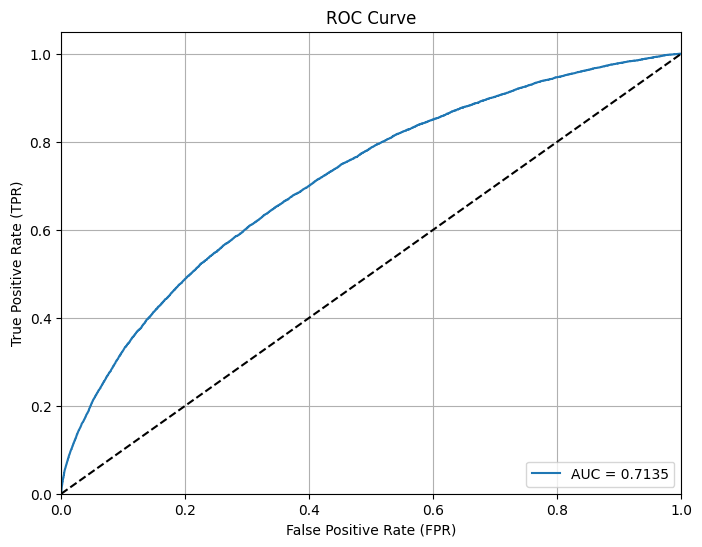

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##Cross-Validated Grid Search

In [ ]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 250],
    'subsample': [0.6, 1.0]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0,
                              eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='roc_auc',
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search model
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 250], 'subsample': [0.6, 1.0]},
             scoring='roc_auc', verbose=1)

##Evaluate best parameters and predict on training set

In [ ]:
# Best parameters from GridSearch
print("Best parameters found: ", grid_search.best_params_)

# Predict with the best model
y_pred_best = grid_search.best_estimator_.predict(x_test)

# Evaluate the tuned XGBoost model
print("XGBoost Classifier (Tuned):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.6}
XGBoost Classifier (Tuned):
Accuracy: 0.9246


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
cm

array([[134258,    125],
       [ 10839,    144]])

In [ ]:
# Predict probabilities for the test set (to calculate AUC)
y_pred_proba = grid_search.best_estimator_.predict_proba(x_test)[:, 1]  # We need probabilities for the positive class

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.7202


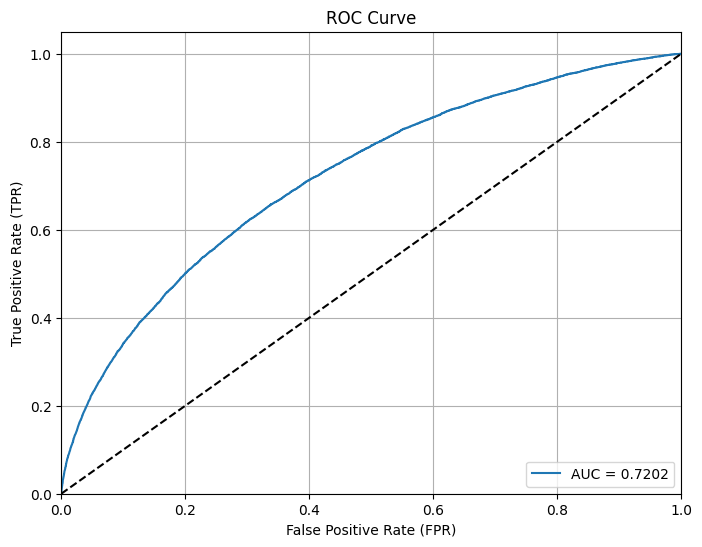

In [ ]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()